# Linear Regression - Scikit-Learn train_test_split

În partea trecută am răspuns la întrebarea "Există o corelație între total_spend și sales? ". Acum dorim să extindem această întrebare, iar aceasta să fie: "Care este corelația între fiecare parte din publicitate (TV, Radio, Newspaper) și sales?" Ce este plăcut la această întrebare este faptul că putem să vedem dacă un anumit feature are o importanță mai mare în ceea ce privește numărul total de sales. Poate dacă se investește mai mult în partea de TV, atunci numărul de sales o să crească considerabil decât dacă se investește mai mult în ziaree  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/08-Linear-Regression-Models/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


În ceea ce privește datele de mai sus, în acest DataFrame avem atât partea de Features cât și cea de labels. Features reprezintă coloanele TV, radio, newspaper, iar labels reprezintă sales. Înainte de a împărți aceste date în Features și labels o să vedem corelația lor.

<AxesSubplot:xlabel='TV', ylabel='sales'>

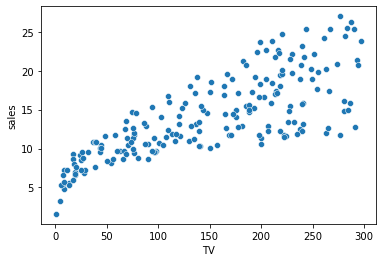

In [10]:
sns.scatterplot(x='TV', y='sales', data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

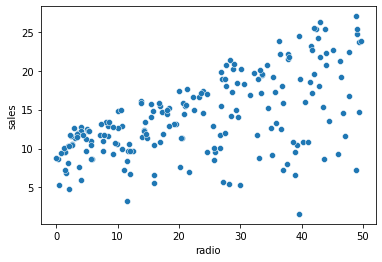

In [7]:
sns.scatterplot(x='radio', y='sales', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

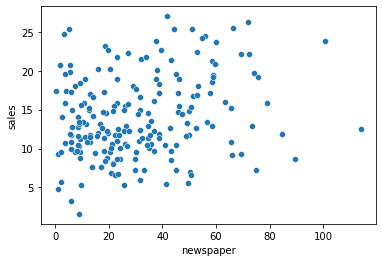

In [11]:
sns.scatterplot(x='newspaper', y='sales', data=df)

Din aceste graph-uri se paote vedea că investirea în TV și Radio are un impact mai mare în ceea ce privește sales. În continuare o să ne creem o vairabilă (denumită X) care o să conțină doar elementele ce reprezintă features din DataFrame-ul cu care lucrăm

In [12]:
X = df.drop(columns='sales')

In [13]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y = df['sales']

In [15]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Acuma (după ce am separat features de labels) urmează partea în care împărțim datele în train set și test set. Acest lucru se face deoarece nu dorim să evaluăm un model pe date pe care deja le-a întâlnit, pe care a fost antrenat. Din librăria de sklearn, din model_selection trebuie să importăm train_test_split() care va face automat asta pentru noi, o să împartă setul de date

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

În cadrul documentației de la train_test_split există un exemplu prin care putem să rulăm această metodă, exemplu pe care o să îl tot folosim pe parcursul acestui tutorial.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Este important ca ordinea prin care se face tuple unpacking să fie cea de sus, adică X_train, X_test, y_train, y_test. Ca și parametrii pentru această funcție i-am pasat ca și prim parametru variabila care reține Features, după label-ul care corespunde pentru fiecare element din variabila X. După aceasta avem parametrul test_size. Acest parametru ne întreabă ce procentaj din testul de date dorim să fie trecut ca și test set. Din codul de mai sus, o treime din date trece în partea de test set, iar restul o să fie în categoria de train set (prin convenție se alege ca 20-30% să treacă în partea de test set). Parametrul de random_state este asemănător cu cel de random_seed din numpy prin care se setează rădăcina pentru algorimtul de selectare randomn, deoarece această metodă de train_test_split alege aleatoriu datele care să intre în train set și test set, iar de aceea setarea acestei rădăcini este importantă deoarece prin acest fel, dacă dorim să comparăm mai mulți algoritmi ne putem asigura de faptul că fiecare o să aibă aceleași date în seeturile de antrenare și de testare.

In [24]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Dacă se printează setul de date cu care am început, putem să vedem că acest DataFrame are un număr de 200 de rânduri.

In [28]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


Din moment ce am specificat ca 30% să meargă în partea de test, în setul de antrenare au mai rămas 140 de elemente. Acest DataFrame are ca și index locația din DataFrame-ul inițial de unde a preluat aceste elemente. Prin intermediul acestor index-uri o să se facă legătura cu partea de labels

In [29]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

După ce am separat datele de antrenare cu cele de testare putem să creem un model. În Scikit-Learn, aceste modele mai poartă denumirea și de estimatori deoarece ceea ce realizează un astfel de algoritm de Machine Learning este doar o estimare, o predicție. Pentru cazul de față o să creem un model de predicție de tipul Linear Regression. Acest model se găsește în modlul linear_model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

Putem să apelăm metoda help asupra acestui model pentru a vedea ce fel de parametrii folosește (hyperparametrii) și ce atribute are modelul respectiv. Urmează să instanțiem modelul respectiv. Ca și prima dată când se utilizează un anumit algoritm este de recomandat ca acesta să se creeze fără a specifica un anumit hyperparametru pentru a vedea cum anume se comportă acesta. După asta se poate merge pe partea de tunare a modelului.

In [32]:
model = LinearRegression()

Acum după ce am creat acest model, acesta așteaptă un set de date pe care să fie antrenat. Modul prin care se antrenează un algoritm este prin metoda 'fit()'. Acestei metode trebuie să îi oferim un set de Features și labels pe care să facă antrenarea. Dorim să facem acestă antrenare pe setul de date de antrenare (X_train, y_train)

In [33]:
model.fit(X_train, y_train)

LinearRegression()

După ce modelul a fost antrenat, putem să facem predicții utilizând acest model. Pentru a face predicții se va utiliza metoda 'predict()'. Ca și argument trebuie să îi oferim un set de date pentru care să facă predicții (setul de date de testare în cazul de față)

In [34]:
model.predict(X_test)

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

Metoda .predict() returnează predicțiile de labels pentru elementele din setul de date de testare X_test (array care conține doar Feature-urile unui element). Ce anume înseamnă asta? Cum se poate evalua acest model? Pentru asta trebuie să vedem cum anumte putem evalua din punct de vedere cantitativ eroarea din setul de date de test. Există mai multe astfel de metode de a evalua o eraore, iar pe partea asta o să ne concentrăm în următoarea parte

## Recapitulare

În cadrul acestei lecturi am învățat următoarele lucruri:

    1. De unde să importăm metoda train_test_split() care ne împarte setul de date în antrenare și testare

        from sklearn.model_selection import train_test_split

    2. Cum să utilizăm metoda train_test_split

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)
    
    3. De unde să importăm algorimtul de Linear Regression

        from sklearn.linear_model import LinearRegression

    4. Cum să instanțiem un model

        model = LinearRegression

    5. Cum să antrenăm un model după ce l-am instanțiat

        model.fit(X_train, y_train)

    6. Cum putem face predicții cu un model pe care tocmai l-am antrenat

        predictions = model.predict(X_test)